In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../results/data/clustered_data.csv")
df.head()

,Id_cliente,num_tx_avance,num_tx_compra,num_tx_seguro,total_valor_avance,total_valor_compra,total_valor_seguro,ratio_avance_compra,dias_desde_ultima_tx,num_transacciones,cluster
0,91,1.0,0.0,0.0,500000.0,0.00,0.0,inf,27,1,1
1,92,2.0,0.0,0.0,400000.0,0.00,0.0,inf,183,2,1
2,94,0.0,4.0,0.0,0.0,1599018.00,0.0,0.000000,23,4,1
3,95,1.0,1.0,0.0,100000.0,1272555.00,0.0,0.078582,52,2,1
4,96,0.0,7.0,0.0,0.0,4037771.29,0.0,0.000000,41,7,1


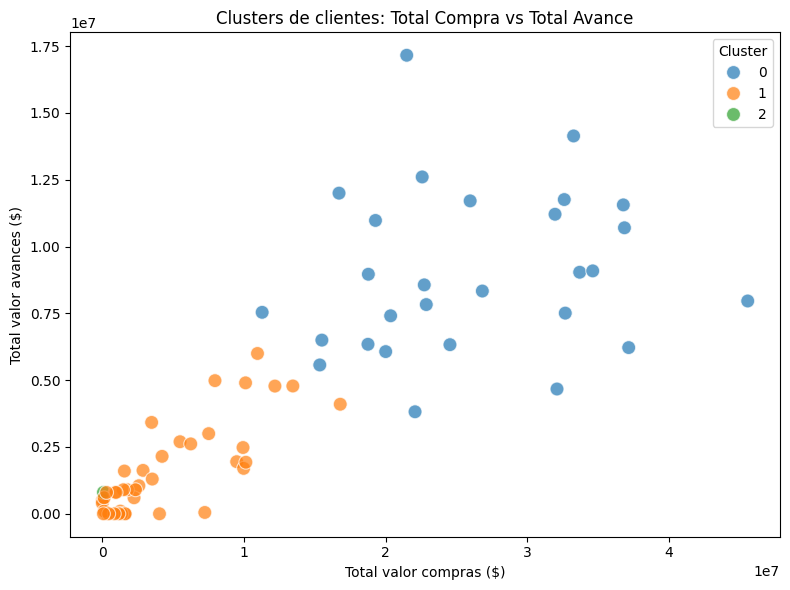

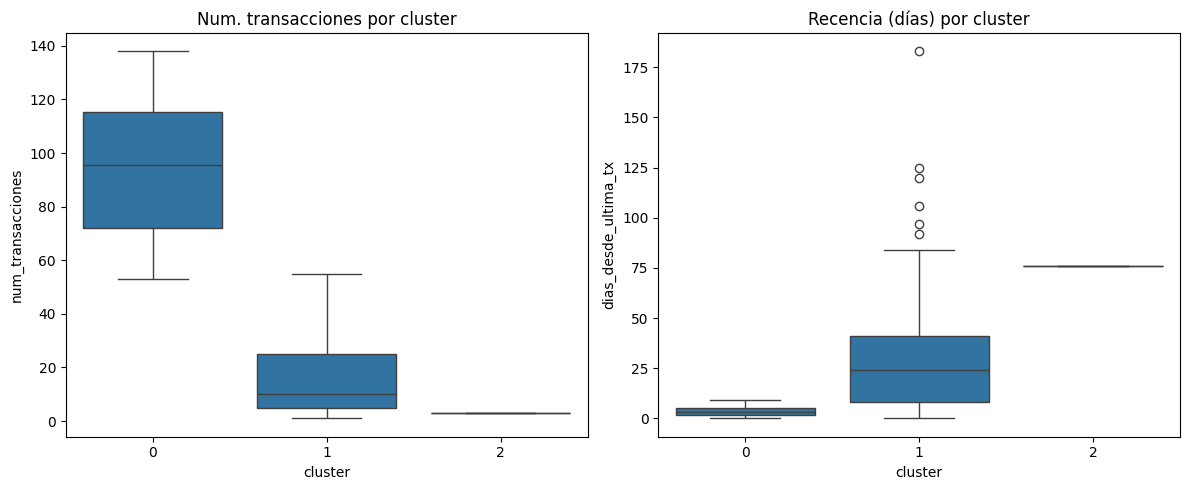

In [24]:
# Graficos 
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="total_valor_compra",
    y="total_valor_avance",
    hue="cluster",
    palette="tab10",
    s=100,
    alpha=0.7
)
plt.title("Clusters de clientes: Total Compra vs Total Avance")
plt.xlabel("Total valor compras ($)")
plt.ylabel("Total valor avances ($)")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# 5. Boxplot de recencia y transacciones por cluster
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(x="cluster", y="num_transacciones", data=df, ax=axes[0])
axes[0].set_title("Num. transacciones por cluster")
sns.boxplot(x="cluster", y="dias_desde_ultima_tx", data=df, ax=axes[1])
axes[1].set_title("Recencia (días) por cluster")
plt.tight_layout()
plt.show()


# Estrategia

Como ya se discutio, se procede a crear la distribucion deestrategias.

In [25]:
# 1. Calcular la mediana del ratio en cluster_1
mediana_1 = df[df.cluster==1]["ratio_avance_compra"].median()

# 2. Función para asignar descuento
def asignar_descuento(row):
    if row.cluster == 0:
        return 0
    elif row.cluster == 2:
        return 25
    elif row.cluster == 1:
        # subdivisión según ratio
        if row.ratio_avance_compra > mediana_1:
            return 20
        else:
            return 5

# 3. Aplicar
df["descuento_%"] = df.apply(asignar_descuento, axis=1)

# 4. Resumen del grupo resultante
print(df["descuento_%"].value_counts())


descuento_%
0     28
5     21
20    20
25     1
Name: count, dtype: int64
